# CAMPUS RECURITMENT PREDICTION ASSIGNMENT
# SRIVENI KUNDURU
# C0876299

In [34]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [35]:
# Loading the dataset
df = pd.read_csv("/Users/srivenikunduru/Downloads/Campus Recuritment Prediction/train.csv")

# Section 1: Data Preprocessing


# 1.1 Handle missing values

In [36]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


# Handling missing salary values

In [37]:
# - Setin salary to 0 if the student is 'Not Placed'
# - Imputing salary with the mean of 'Placed' students' salaries if the status is 'Placed'
df['salary'] = df.apply(lambda row: 0 if row['status'] == 'Not Placed' else row['salary'], axis=1)
df['salary'].fillna(df[df['status'] == 'Placed']['salary'].mean(), inplace=True)

In [38]:
# Confirming there are no missing values in 'salary' anymore
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


# 1.2 Encoding categorical variables

In [39]:
# Encoding 'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

# Section 2: Feature Extraction

# 2.1 Creating new feature "average_academic_score" by averaging SSC, HSC, and Degree percentages

In [40]:
df['average_academic_score'] = (df['ssc_p'] + df['hsc_p'] + df['degree_p']) / 3

# 2.2 Creating another feature for total experience score

In [41]:
df['work_experience_score'] = np.where(df['workex'] == 1, df['etest_p'] * 1.2, df['etest_p'])


# Section 3: Data Visualization

# 3.1 Distribution of SSC percentage based on placement status

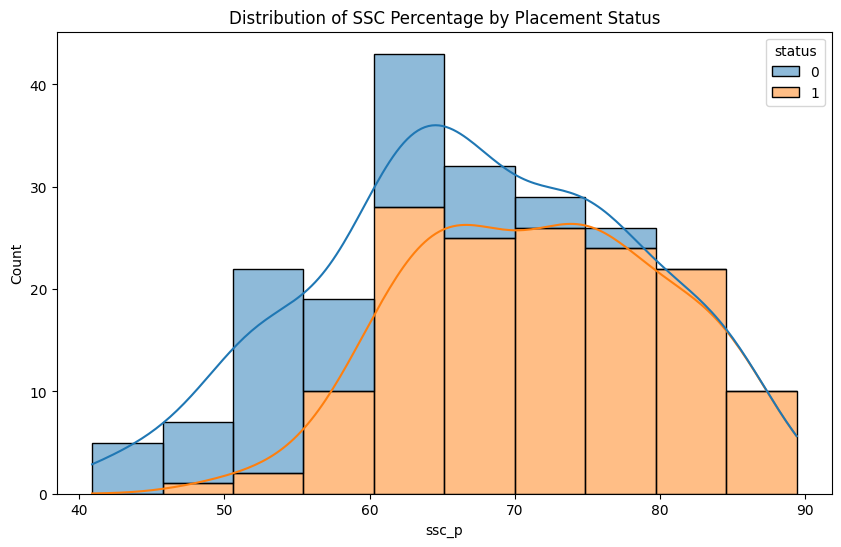

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ssc_p', hue='status', multiple="stack", kde=True)
plt.title('Distribution of SSC Percentage by Placement Status')
plt.show()

# 3.2 Correlation Heatmap

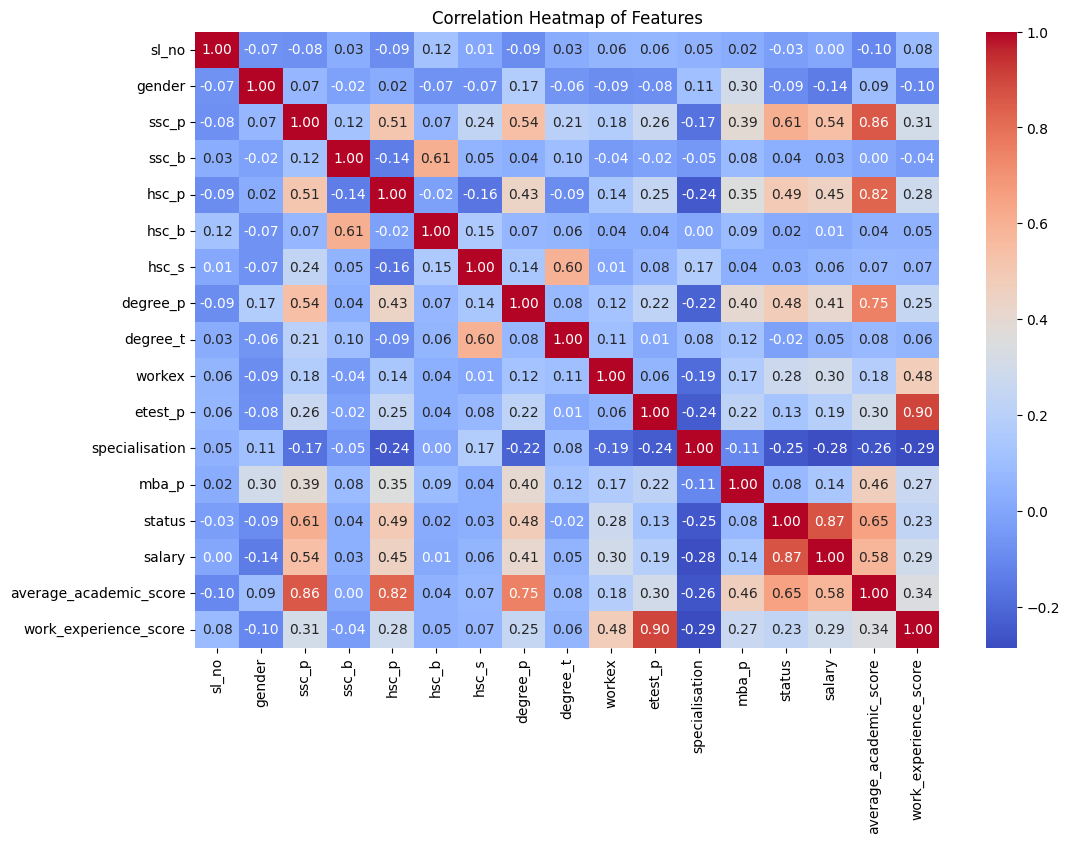

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# 3.3 Boxplot of Degree Percentage by Placement Status

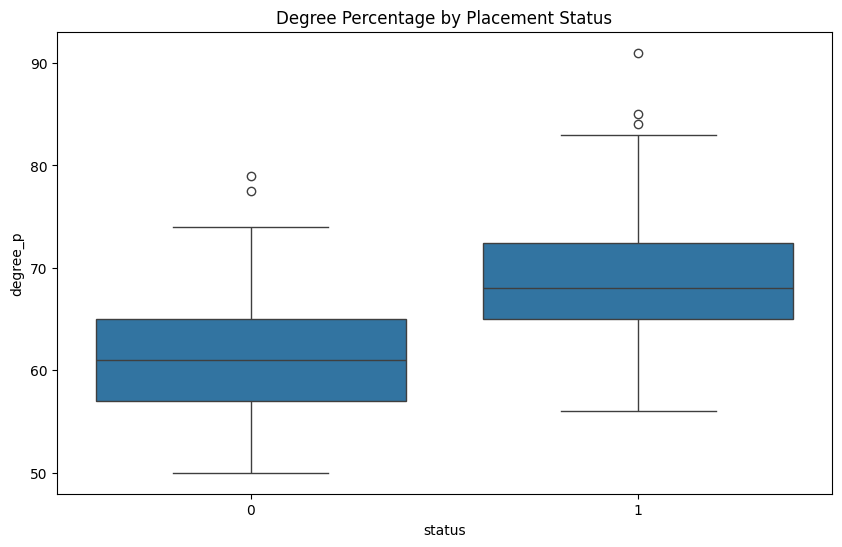

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='degree_p')
plt.title('Degree Percentage by Placement Status')
plt.show()

# 3.4 Countplot of Specialisation vs Placement Status

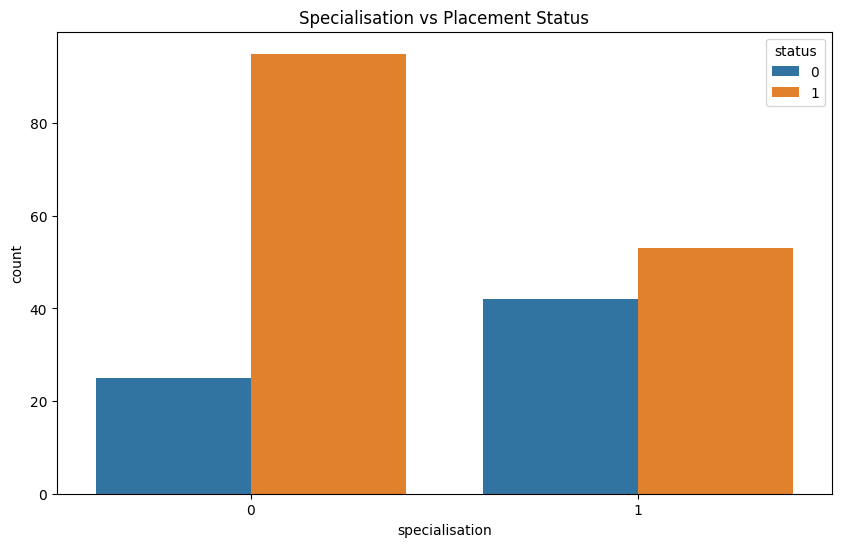

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='specialisation', hue='status')
plt.title('Specialisation vs Placement Status')
plt.show()

# Section 4: Feature Selection

# 4.1 Correlation with target variable (status)

In [46]:
correlation = df.corr()['status'].sort_values(ascending=False)
print("Features most correlated with Placement Status:\n", correlation)

Features most correlated with Placement Status:
 status                    1.000000
salary                    0.865774
average_academic_score    0.649935
ssc_p                     0.607889
hsc_p                     0.491228
degree_p                  0.479861
workex                    0.276060
work_experience_score     0.233223
etest_p                   0.127639
mba_p                     0.076922
ssc_b                     0.037297
hsc_s                     0.033442
hsc_b                     0.016945
degree_t                 -0.020352
sl_no                    -0.026859
gender                   -0.090670
specialisation           -0.250655
Name: status, dtype: float64


# 4.2 Selecting top correlated features

In [47]:
top_features = correlation[correlation.abs() > 0.2].index.tolist()
print("Top Features: ", top_features)

Top Features:  ['status', 'salary', 'average_academic_score', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'work_experience_score', 'specialisation']


# 4.3 Model-based feature selection using Random Forest importance

In [48]:
rf = RandomForestClassifier(random_state=42)
X = df.drop(['status', 'salary'], axis=1)  # Features
y = df['status']  # Target

In [49]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

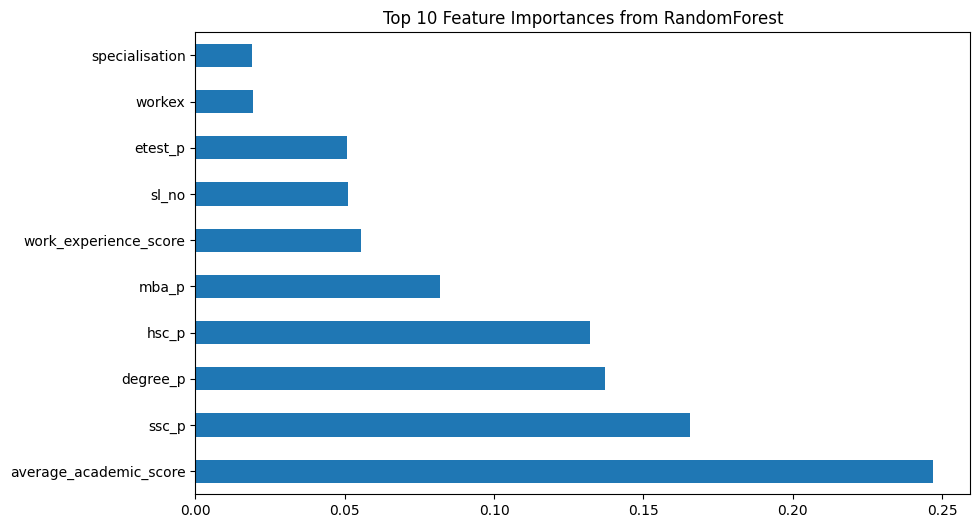

In [50]:
# Plotting Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from RandomForest')
plt.show()

# Section 5: Model Training and Evaluation

In [51]:
# Import necessary libraries for models and evaluation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 5.1 Splitting the Data into Training and Testing Sets

In [52]:
# Splitting the dataset into training and testing sets (70% training, 30% testing)
X = df.drop(['status', 'salary'], axis=1)  # Features
y = df['status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (150, 15)
Testing set shape:  (65, 15)


# 5.2 Model Selection: Training Multiple Models

# Random Forest Classifier

In [53]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction using Random Forest
y_pred_rf = rf_model.predict(X_test)


# Support Vector Machine (SVM)

In [54]:
# Support Vector Classifier (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Prediction using SVM
y_pred_svm = svm_model.predict(X_test)


# Logistic Regression

In [55]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Prediction using Logistic Regression
y_pred_lr = lr_model.predict(X_test)


/Users/srivenikunduru/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5.3 Voting Classifier

In [56]:
# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lr', lr_model)], voting='soft')
voting_clf.fit(X_train, y_train)

# Prediction using Voting Classifier
y_pred_voting = voting_clf.predict(X_test)


/Users/srivenikunduru/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5.4 Model Evaluation: Metrics and Confusion Matrices

In [57]:
# Function to print evaluation metrics for each model
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='binary'))
    print("Recall:", recall_score(y_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n-------------------------\n")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate Voting Classifier
evaluate_model(y_test, y_pred_voting, "Voting Classifier")


--- Random Forest ---
Accuracy: 0.8307692307692308
Precision: 0.84
Recall: 0.9333333333333333
F1 Score: 0.8842105263157894

Confusion Matrix:
 [[12  8]
 [ 3 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

    accuracy                           0.83        65
   macro avg       0.82      0.77      0.78        65
weighted avg       0.83      0.83      0.82        65


-------------------------

--- SVM ---
Accuracy: 0.7538461538461538
Precision: 0.7457627118644068
Recall: 0.9777777777777777
F1 Score: 0.8461538461538461

Confusion Matrix:
 [[ 5 15]
 [ 1 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.25      0.38        20
           1       0.75      0.98      0.85        45

    accuracy                           0.75        65
   macro avg       0.79      0.61      0.62      

# 5.5 Visualization of Results

# Confusion Matrix Visualization

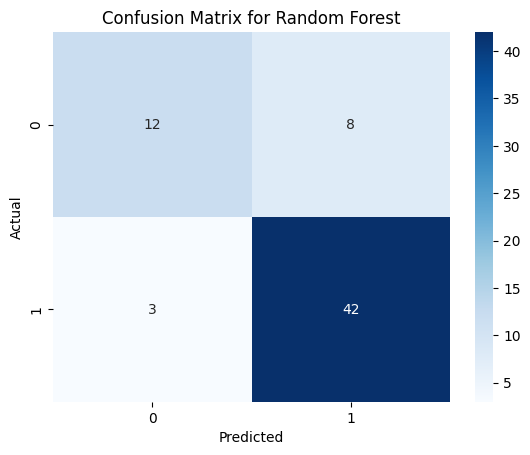

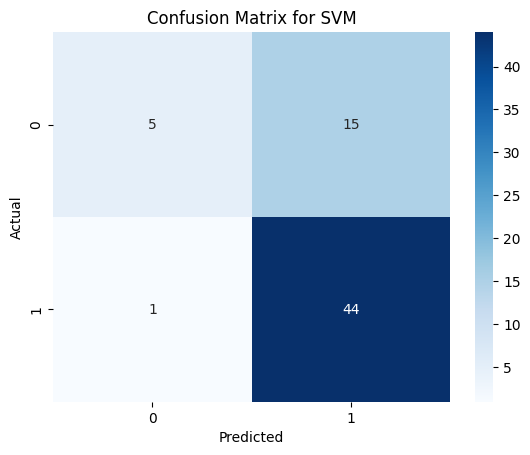

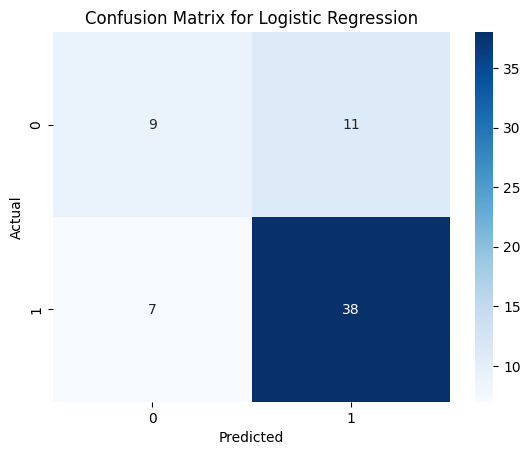

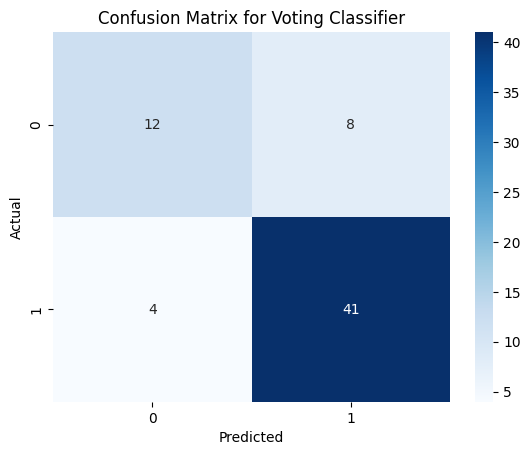

In [58]:
# Function to plot confusion matrices
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_voting, "Voting Classifier")


# 5.6 Comparing Model Performance

# Bar Plot of Performance Metrics

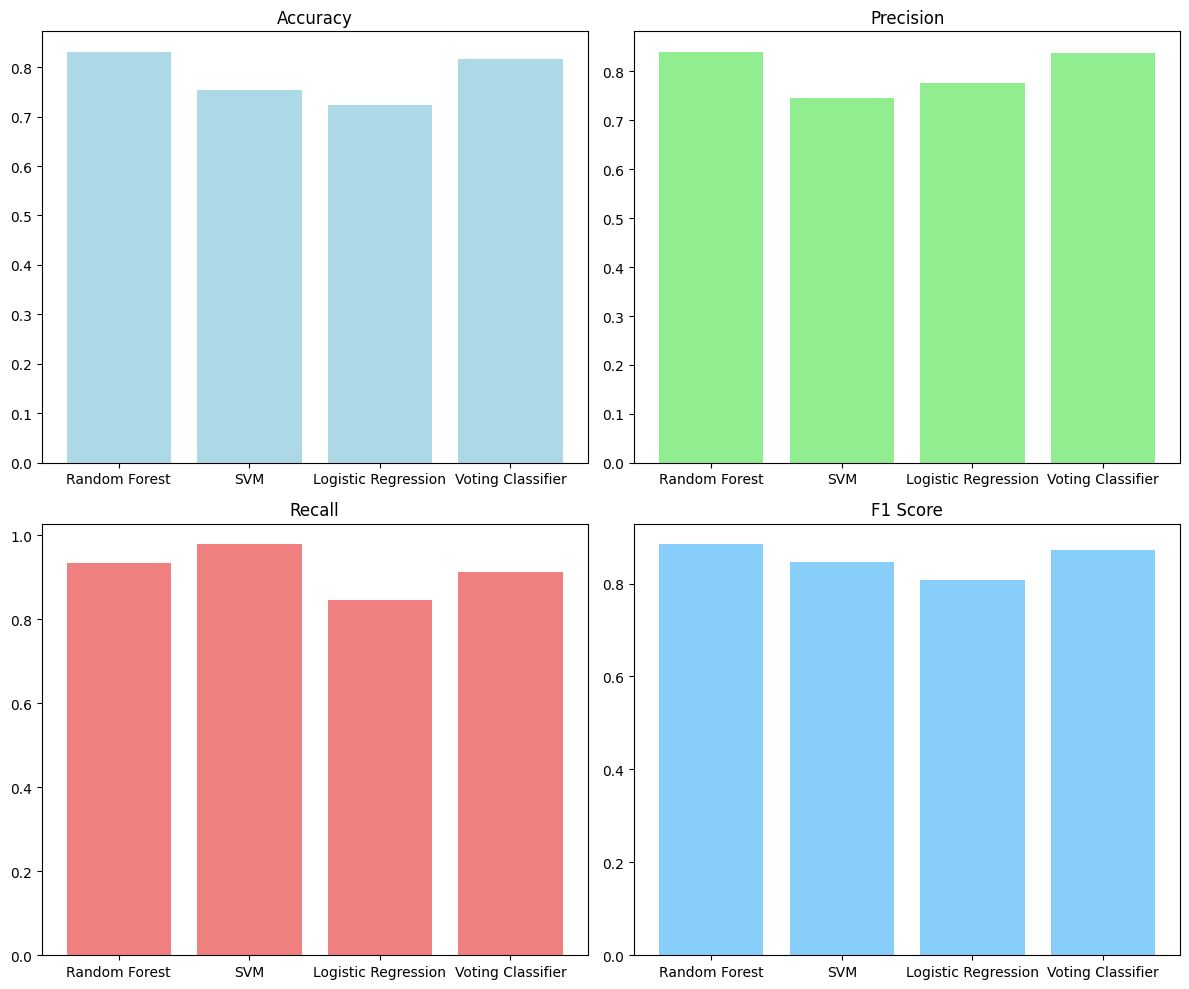

In [59]:
# Comparison of model performances
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Voting Classifier']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_voting)
]

precisions = [
    precision_score(y_test, y_pred_rf, average='binary'),
    precision_score(y_test, y_pred_svm, average='binary'),
    precision_score(y_test, y_pred_lr, average='binary'),
    precision_score(y_test, y_pred_voting, average='binary')
]

recalls = [
    recall_score(y_test, y_pred_rf, average='binary'),
    recall_score(y_test, y_pred_svm, average='binary'),
    recall_score(y_test, y_pred_lr, average='binary'),
    recall_score(y_test, y_pred_voting, average='binary')
]

f1_scores = [
    f1_score(y_test, y_pred_rf, average='binary'),
    f1_score(y_test, y_pred_svm, average='binary'),
    f1_score(y_test, y_pred_lr, average='binary'),
    f1_score(y_test, y_pred_voting, average='binary')
]

# Plotting the metrics
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
ax[0, 0].bar(models, accuracies, color='lightblue')
ax[0, 0].set_title("Accuracy")

# Precision
ax[0, 1].bar(models, precisions, color='lightgreen')
ax[0, 1].set_title("Precision")

# Recall
ax[1, 0].bar(models, recalls, color='lightcoral')
ax[1, 0].set_title("Recall")

# F1 Score
ax[1, 1].bar(models, f1_scores, color='lightskyblue')
ax[1, 1].set_title("F1 Score")

plt.tight_layout()
plt.show()
